Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns= boston.feature_names)

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos["Price"] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [6]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


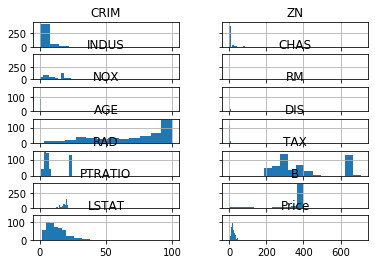

In [7]:
#plt.figure(figsize=(20,30))
fig, ax = plt.subplots(7, 2, sharex='col', sharey='row')

m=0
for i in range(7):
    for j in range(2):

        bos.hist(column = bos.columns[m], bins = 12, ax=ax[i,j], figsize=(20, 30))
        m+=1

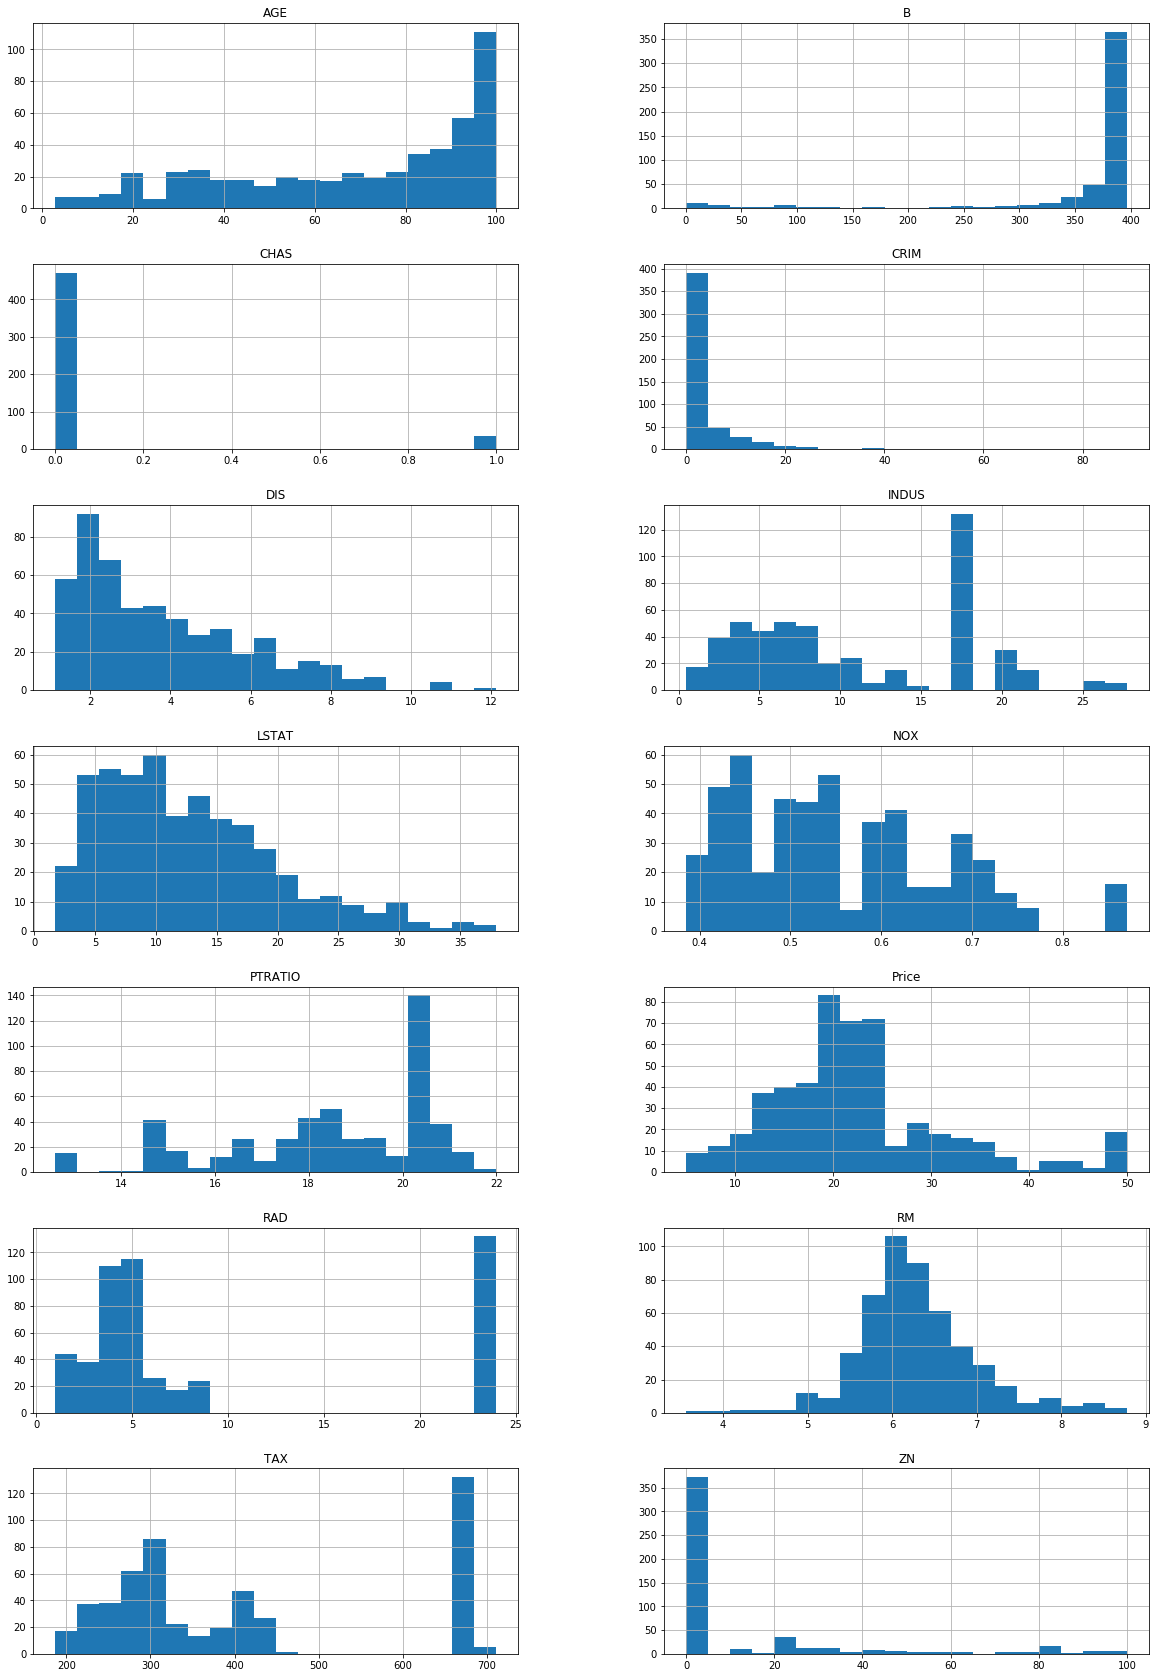

In [8]:
bos.hist(layout=(7,2),figsize=(20,30),bins=20)
plt.show()

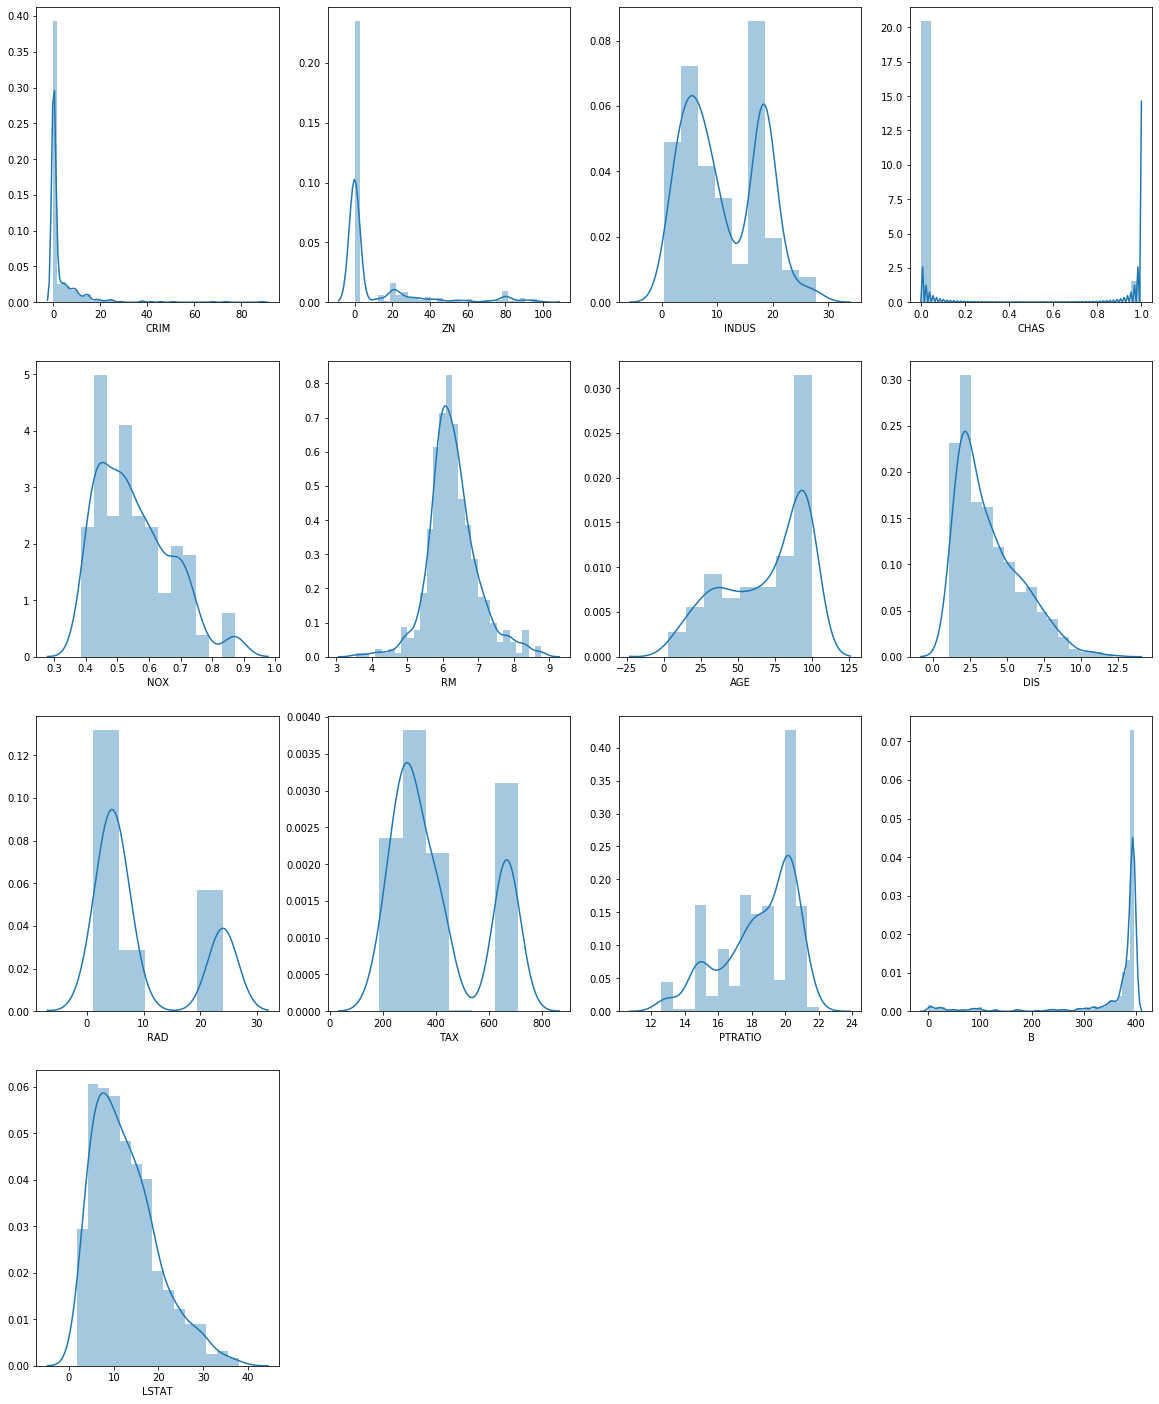

In [9]:
plt.figure(figsize=(20,25))
plot=1
for i in bos.columns:
    if plot<14:
        ax=plt.subplot(4,4,plot)
        sns.distplot(bos[i])
        plt.xlabel(i)
    plot+=1

In [10]:
X = bos.drop(["Price"],axis=1)
y = bos["Price"]

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

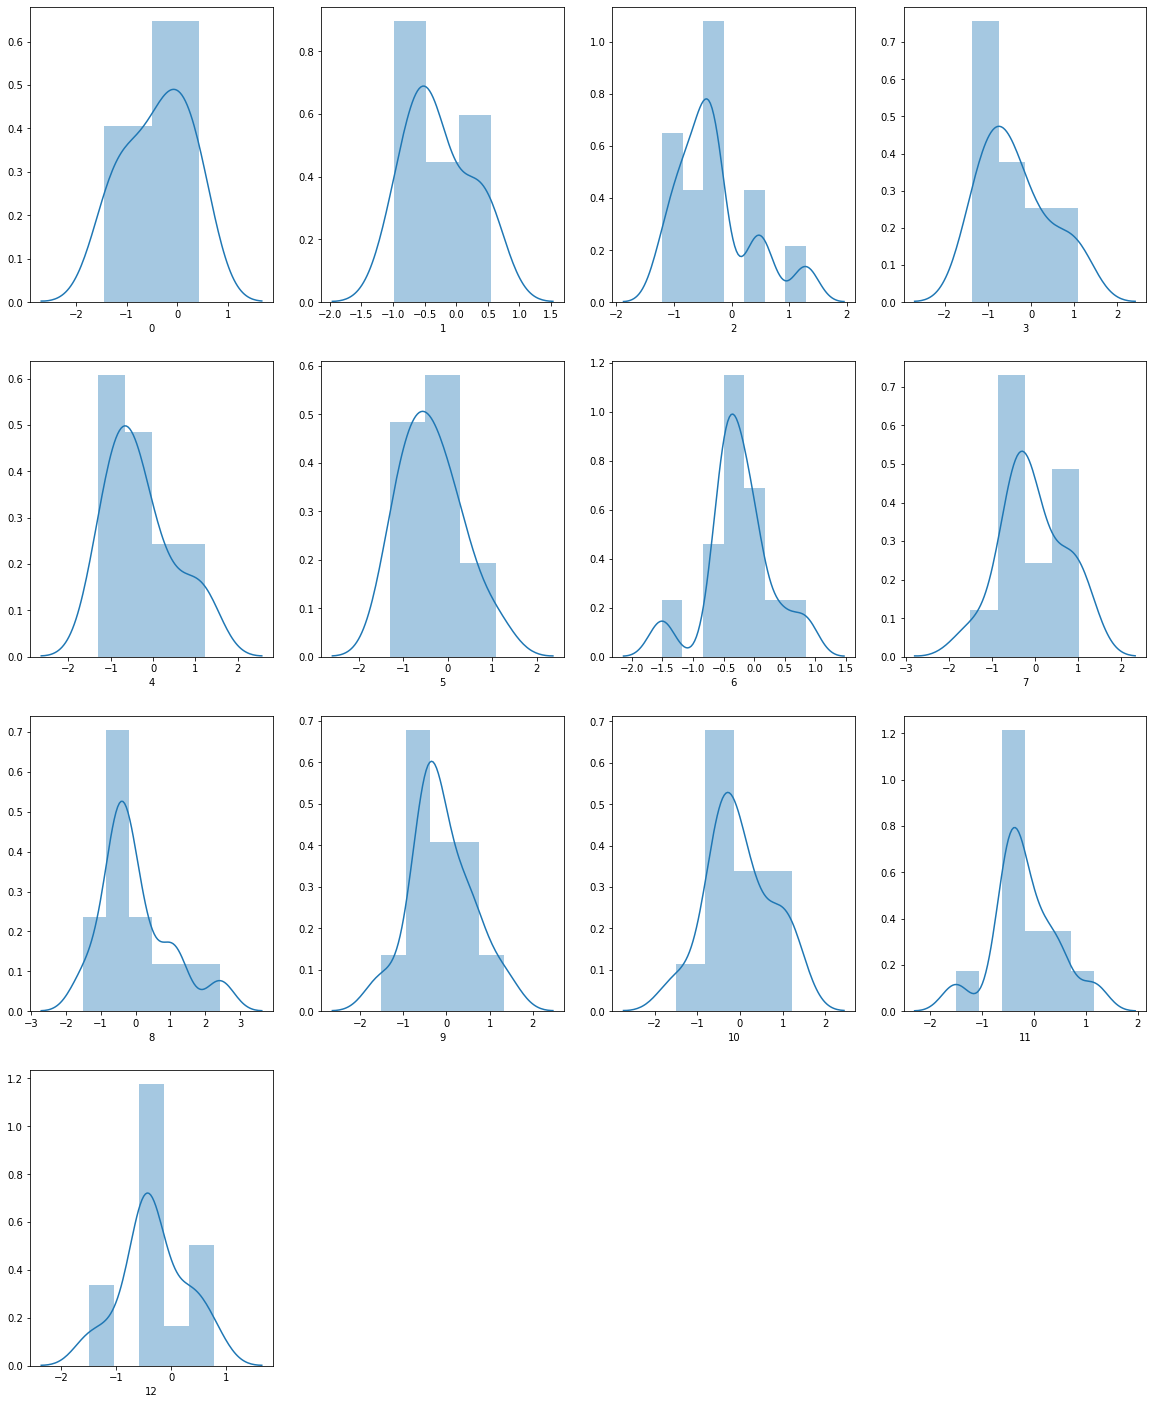

In [12]:
plt.figure(figsize=(20,25))
plot=1
for i in range(len(X)):
    if plot<14:
        ax=plt.subplot(4,4,plot)
        sns.distplot(X_std[i])
        plt.xlabel(i)
    plot+=1

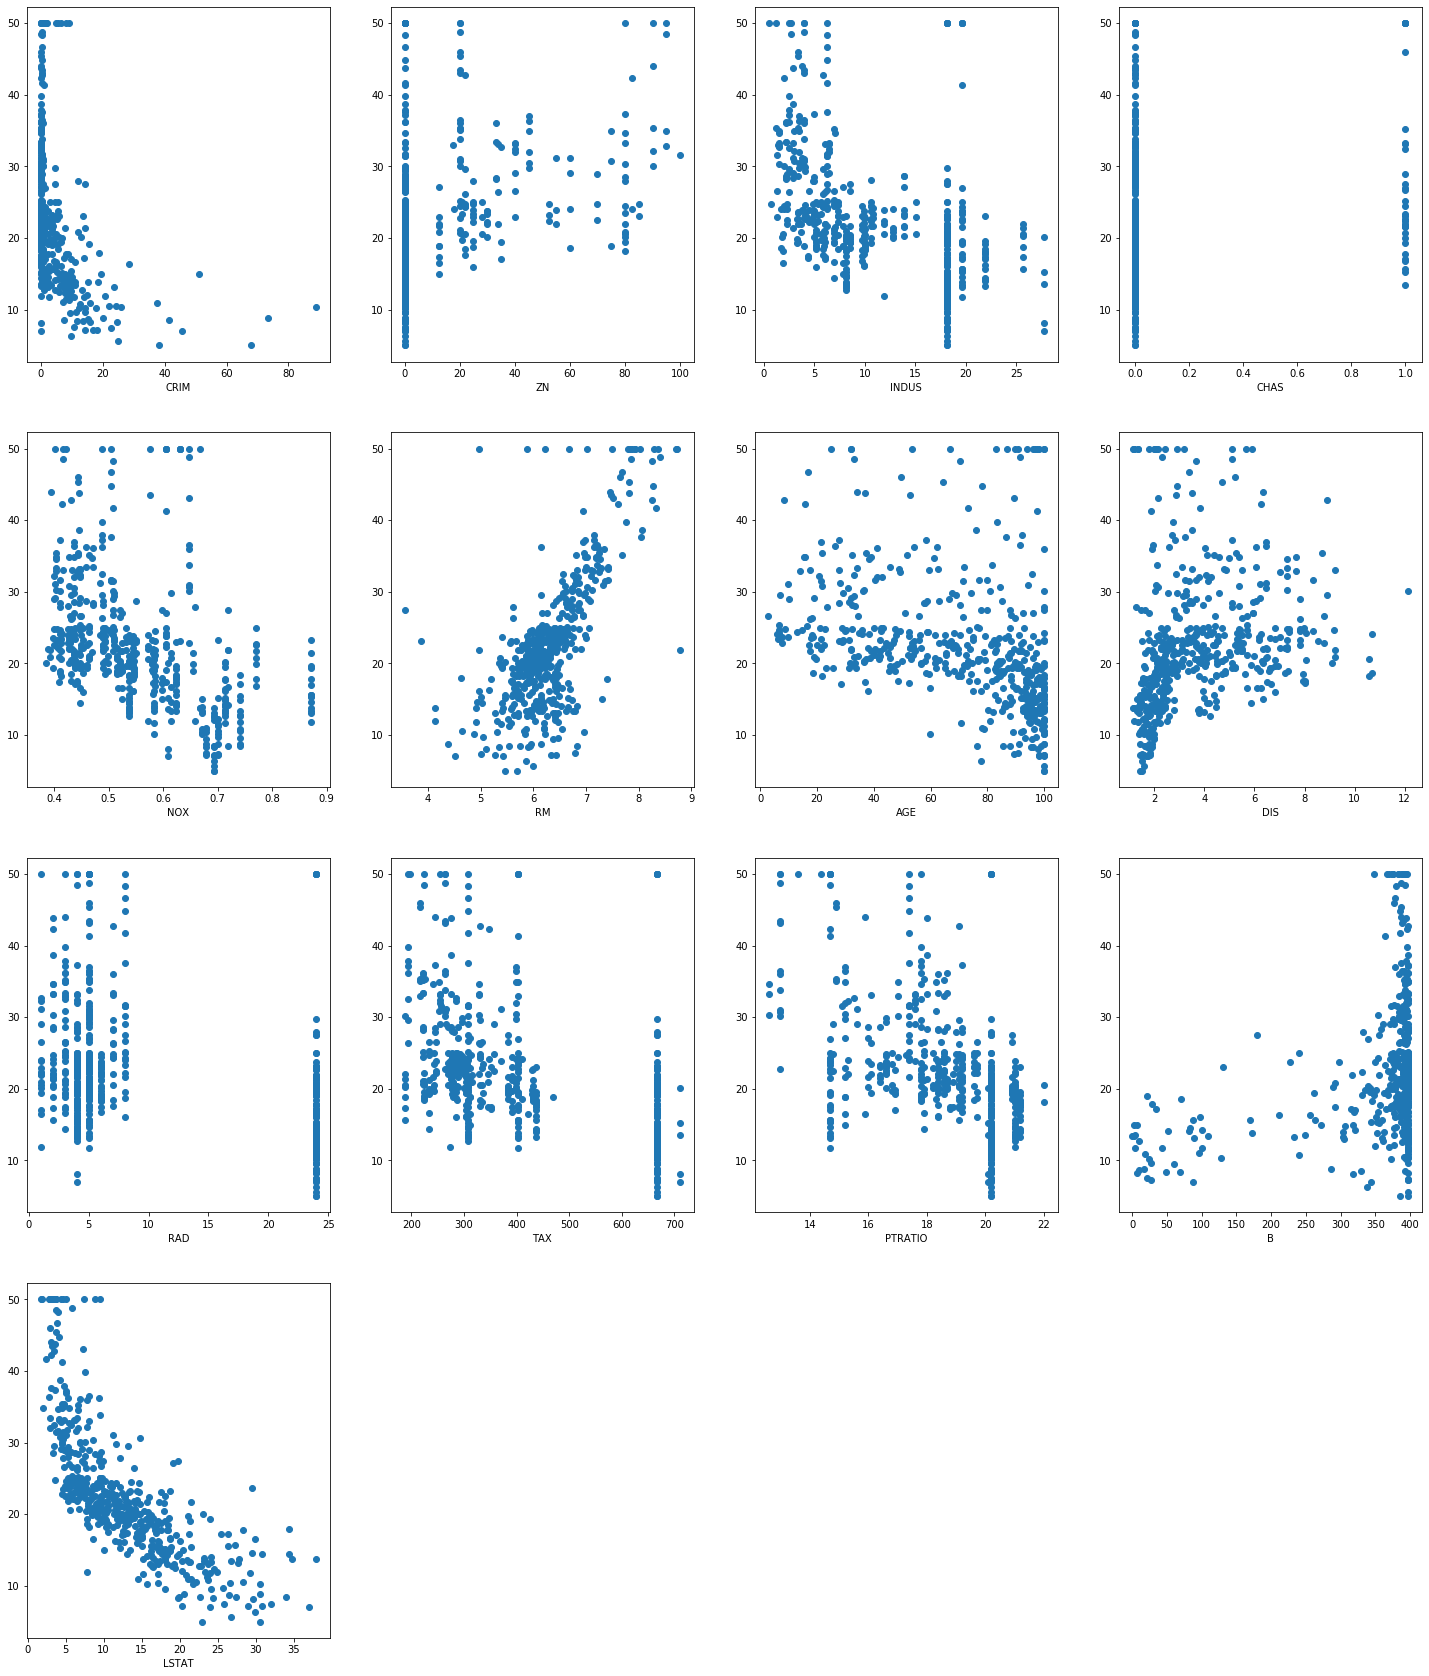

In [13]:
plt.figure(figsize=(25,30))
plot = 1
for i in bos.columns:
    if plot<14:
        ax=plt.subplot(4,4,plot)
        plt.scatter(bos[i],bos["Price"])
        plt.xlabel(i)
    plot+=1

In [14]:
bos.corr()["Price"]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

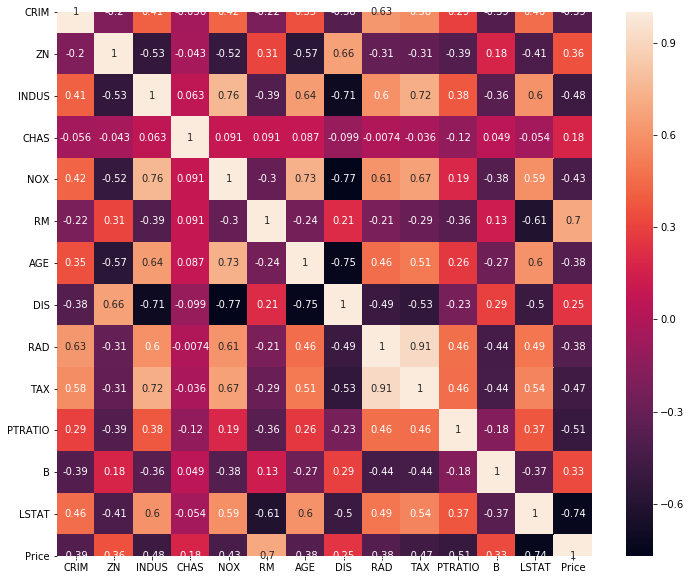

In [15]:
f, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(bos.corr(),annot=True)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_std,i) for i in range(X_std.shape[1])]
vif['Features']=X.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [17]:
X=X.drop(['RAD','TAX'],axis=1)
X_std= sc.fit_transform(X)

In [18]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_std,i) for i in range(X_std.shape[1])]
vif['Features']=X.columns
vif

,VIF,Features
0,1.478206,CRIM
1,2.154483,ZN
2,3.179166,INDUS
3,1.057805,CHAS
4,3.901348,NOX
5,1.872532,RM
6,3.075755,AGE
7,3.954443,DIS
8,1.496077,PTRATIO
9,1.316559,B


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size = 0.2,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
score_train=reg.score(x_train,y_train)
score_train

0.7431780545576675

In [28]:
import pickle
filename = 'finalized_linear_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [39]:
filename = 'scaled_model.pickle'
pickle.dump(sc, open(filename, 'wb'))

In [40]:
mod = pickle.load(open(filename, 'rb'))